<h1 style=font-size:56px>SARS-CoV-2 Data Science Project</h1>                                              

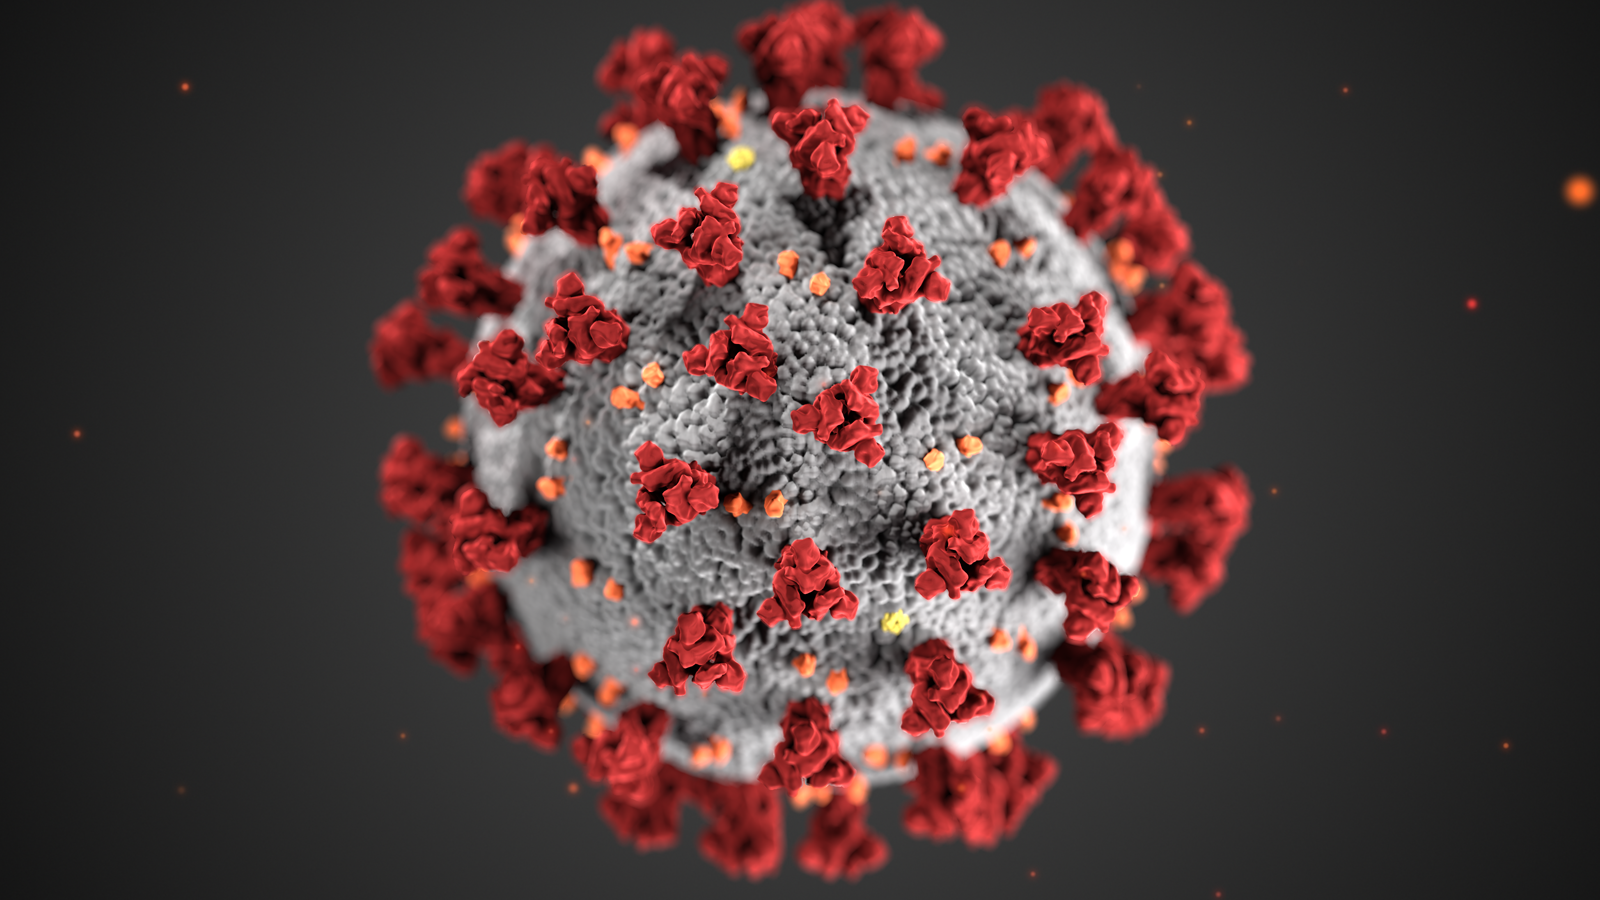
   
**Project Description:**
The purpose of this project is to apply Data Science techniques to practical, real world data sets. I began by graphing various features against one another to identify any patterns or trends that may reside within the data. My current goal is to validate any potential relationships via statistical measures (p-values) and then create a machine learning model that can reasonably estimate future results. The data set I used for this project came from Our World in Data's Github and accounts for the latest updates they have regarding various features of SARS-CoV-2 (total vaccinated, location, continent, total deaths, population density, etc.).

<br />

**Data Source:**
[OWID GitHub Data Source](https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.json)
<br />
<br />

**Data Science Packages Used**:
<ol>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scipy</li>
    <li>Scikit Learn</li>
</ol>


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json

In [2]:
# import sys
# !{sys.executable} -m pip install <PACKAGE_NAME>

# Loading JSON from OWID GitHub into Pandas DataFrame


In [3]:
results = requests.get(url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json")
deserialized_json = json.loads(results.content)

# Transposing to represent map rows to countries and columns to SARS-CoV-2 characteristics
df = pd.DataFrame.from_dict(deserialized_json).transpose()

In [4]:
# Saving JSON locally
with open("latest.json") as json_file:
    json.dumps(results.json())
    json_file.close()

In [5]:
# Filtering any any entries with OWID since they represent regional statistics
countries = df[df["continent"].notnull()].drop(["OWID_KOS"], axis=0)

# Part I: Gaining Insight on Total Deaths, Population, and Region

## Scatterplot Marking the Relationship between Population and Deaths Per Country
* Does not include CHN/IND
* Does not include entries marked with OWID prefixes those seem to indicate regional statistics

In [6]:
# Setting Canvas Style for Plots
plt.style.use("ggplot")

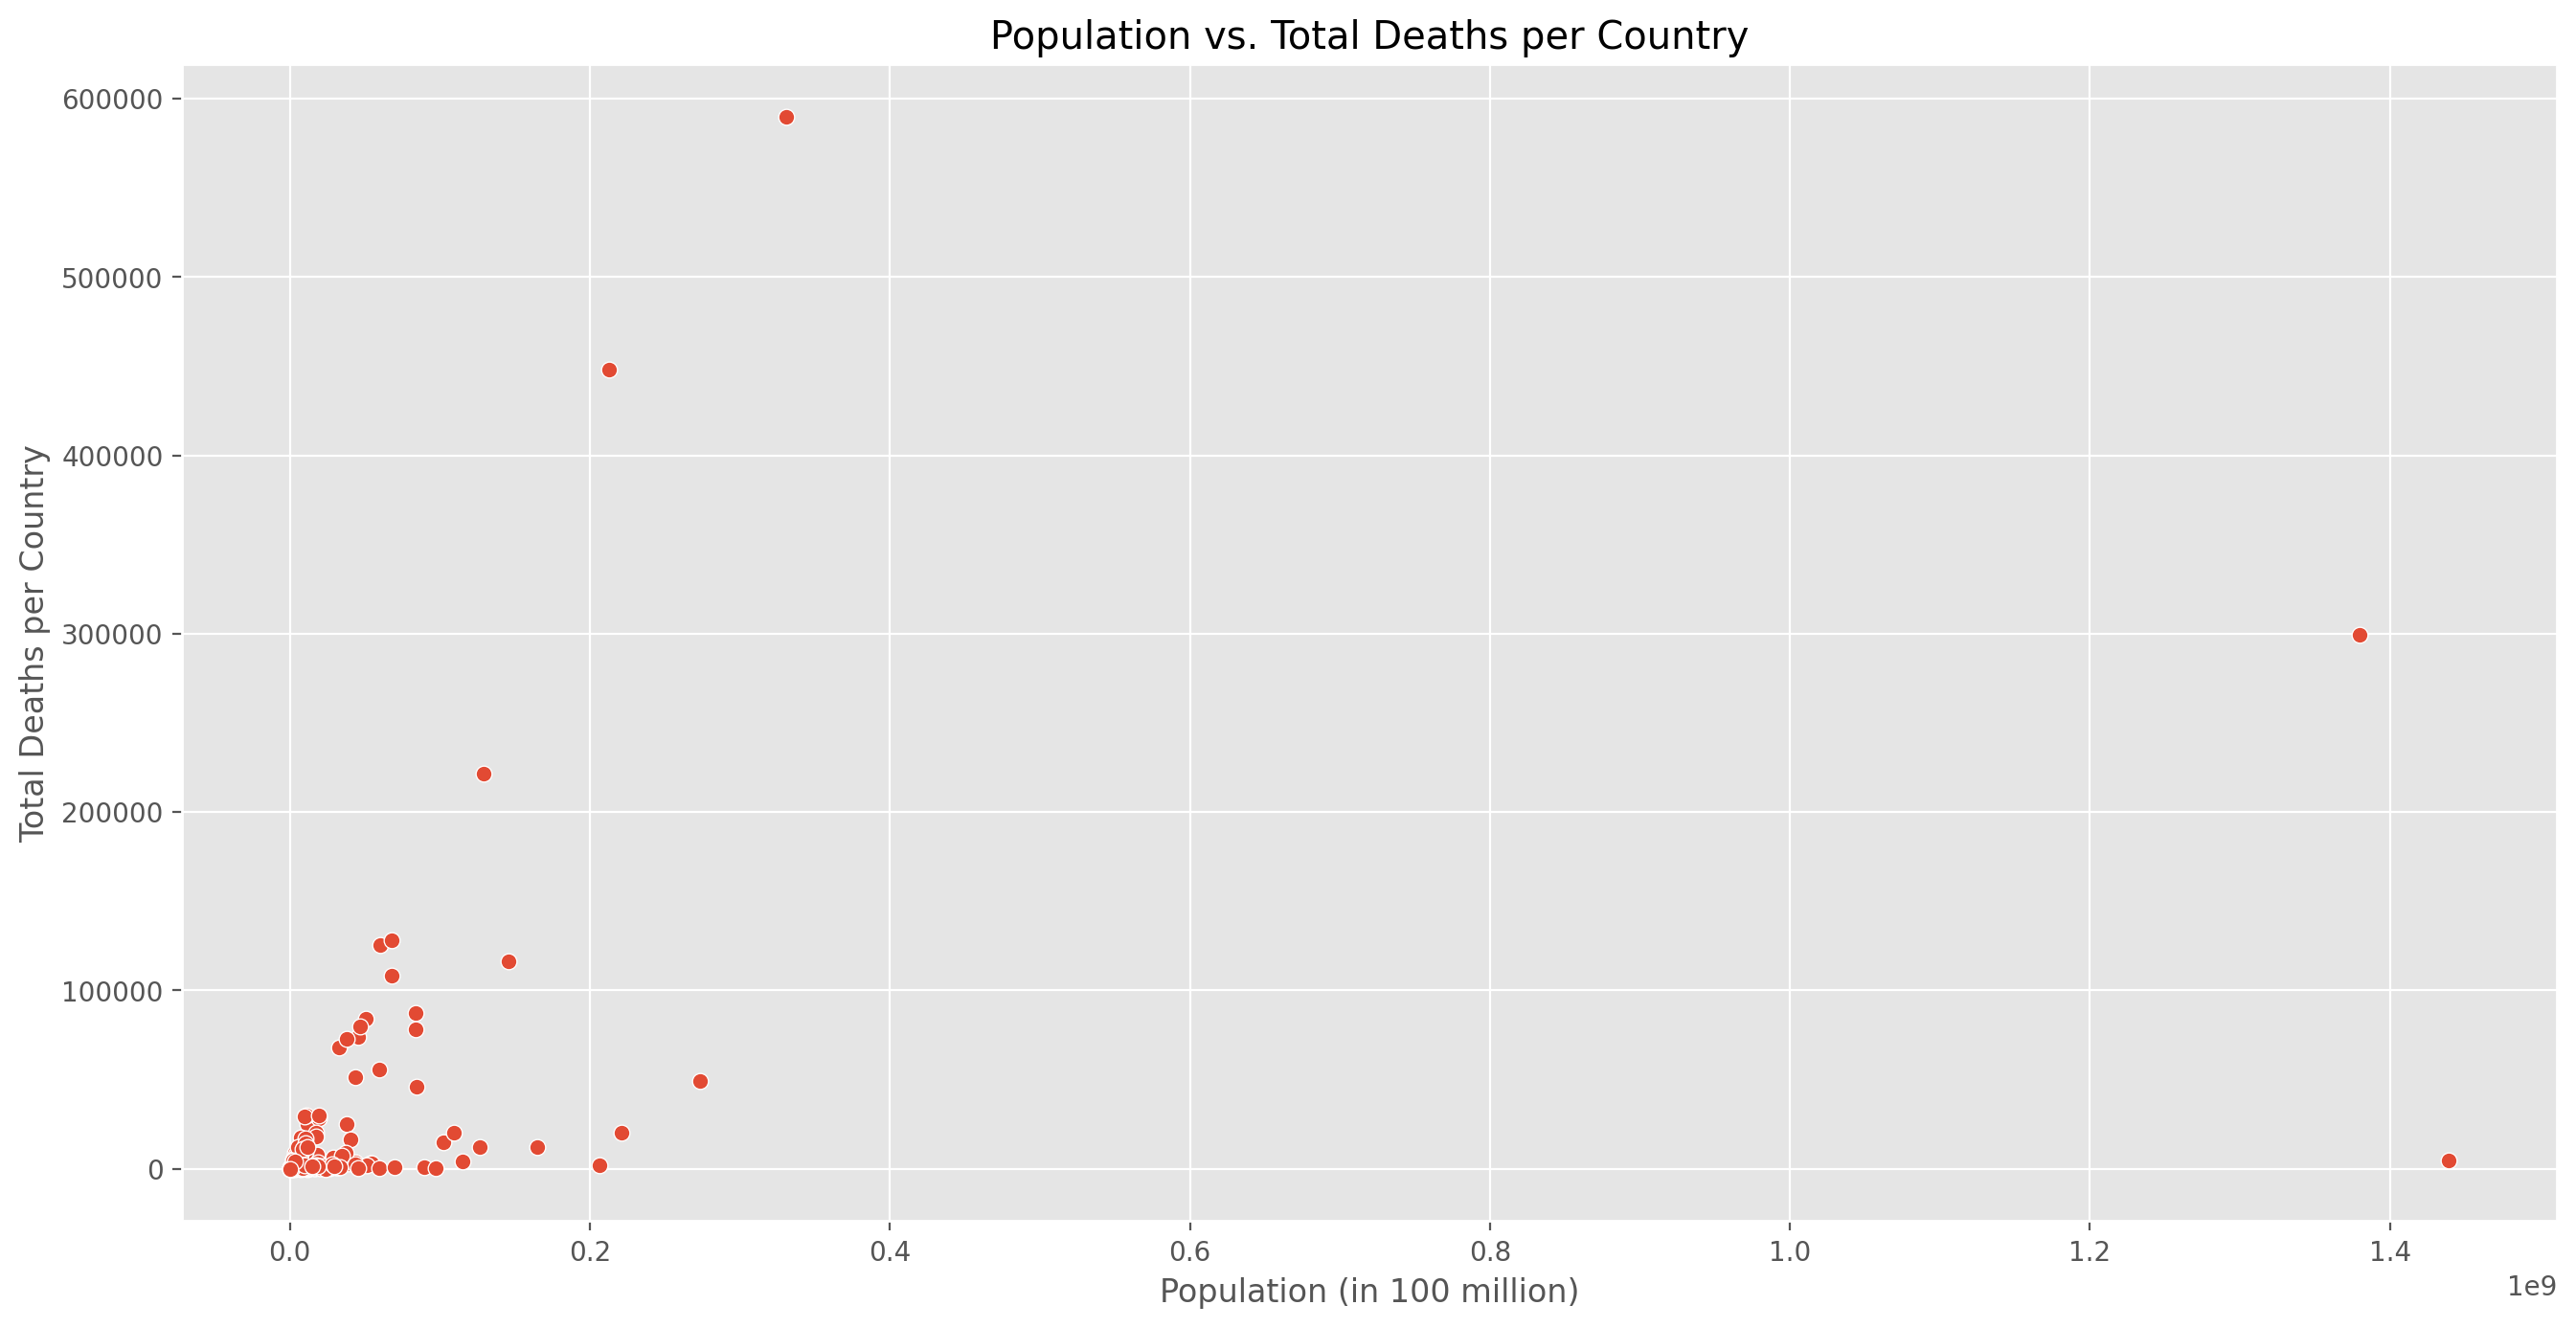

In [45]:
# RAW SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.scatterplot(x="population", y="total_deaths", data=countries)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")

plt.show();

In [8]:
# Removing CHI and IND since there populations are much larger than the rest of the world.
# Only Removing to get a clearer picture of the other countries
countries_exclude_chn_ind = countries.drop(["CHN", "IND"], axis=0)

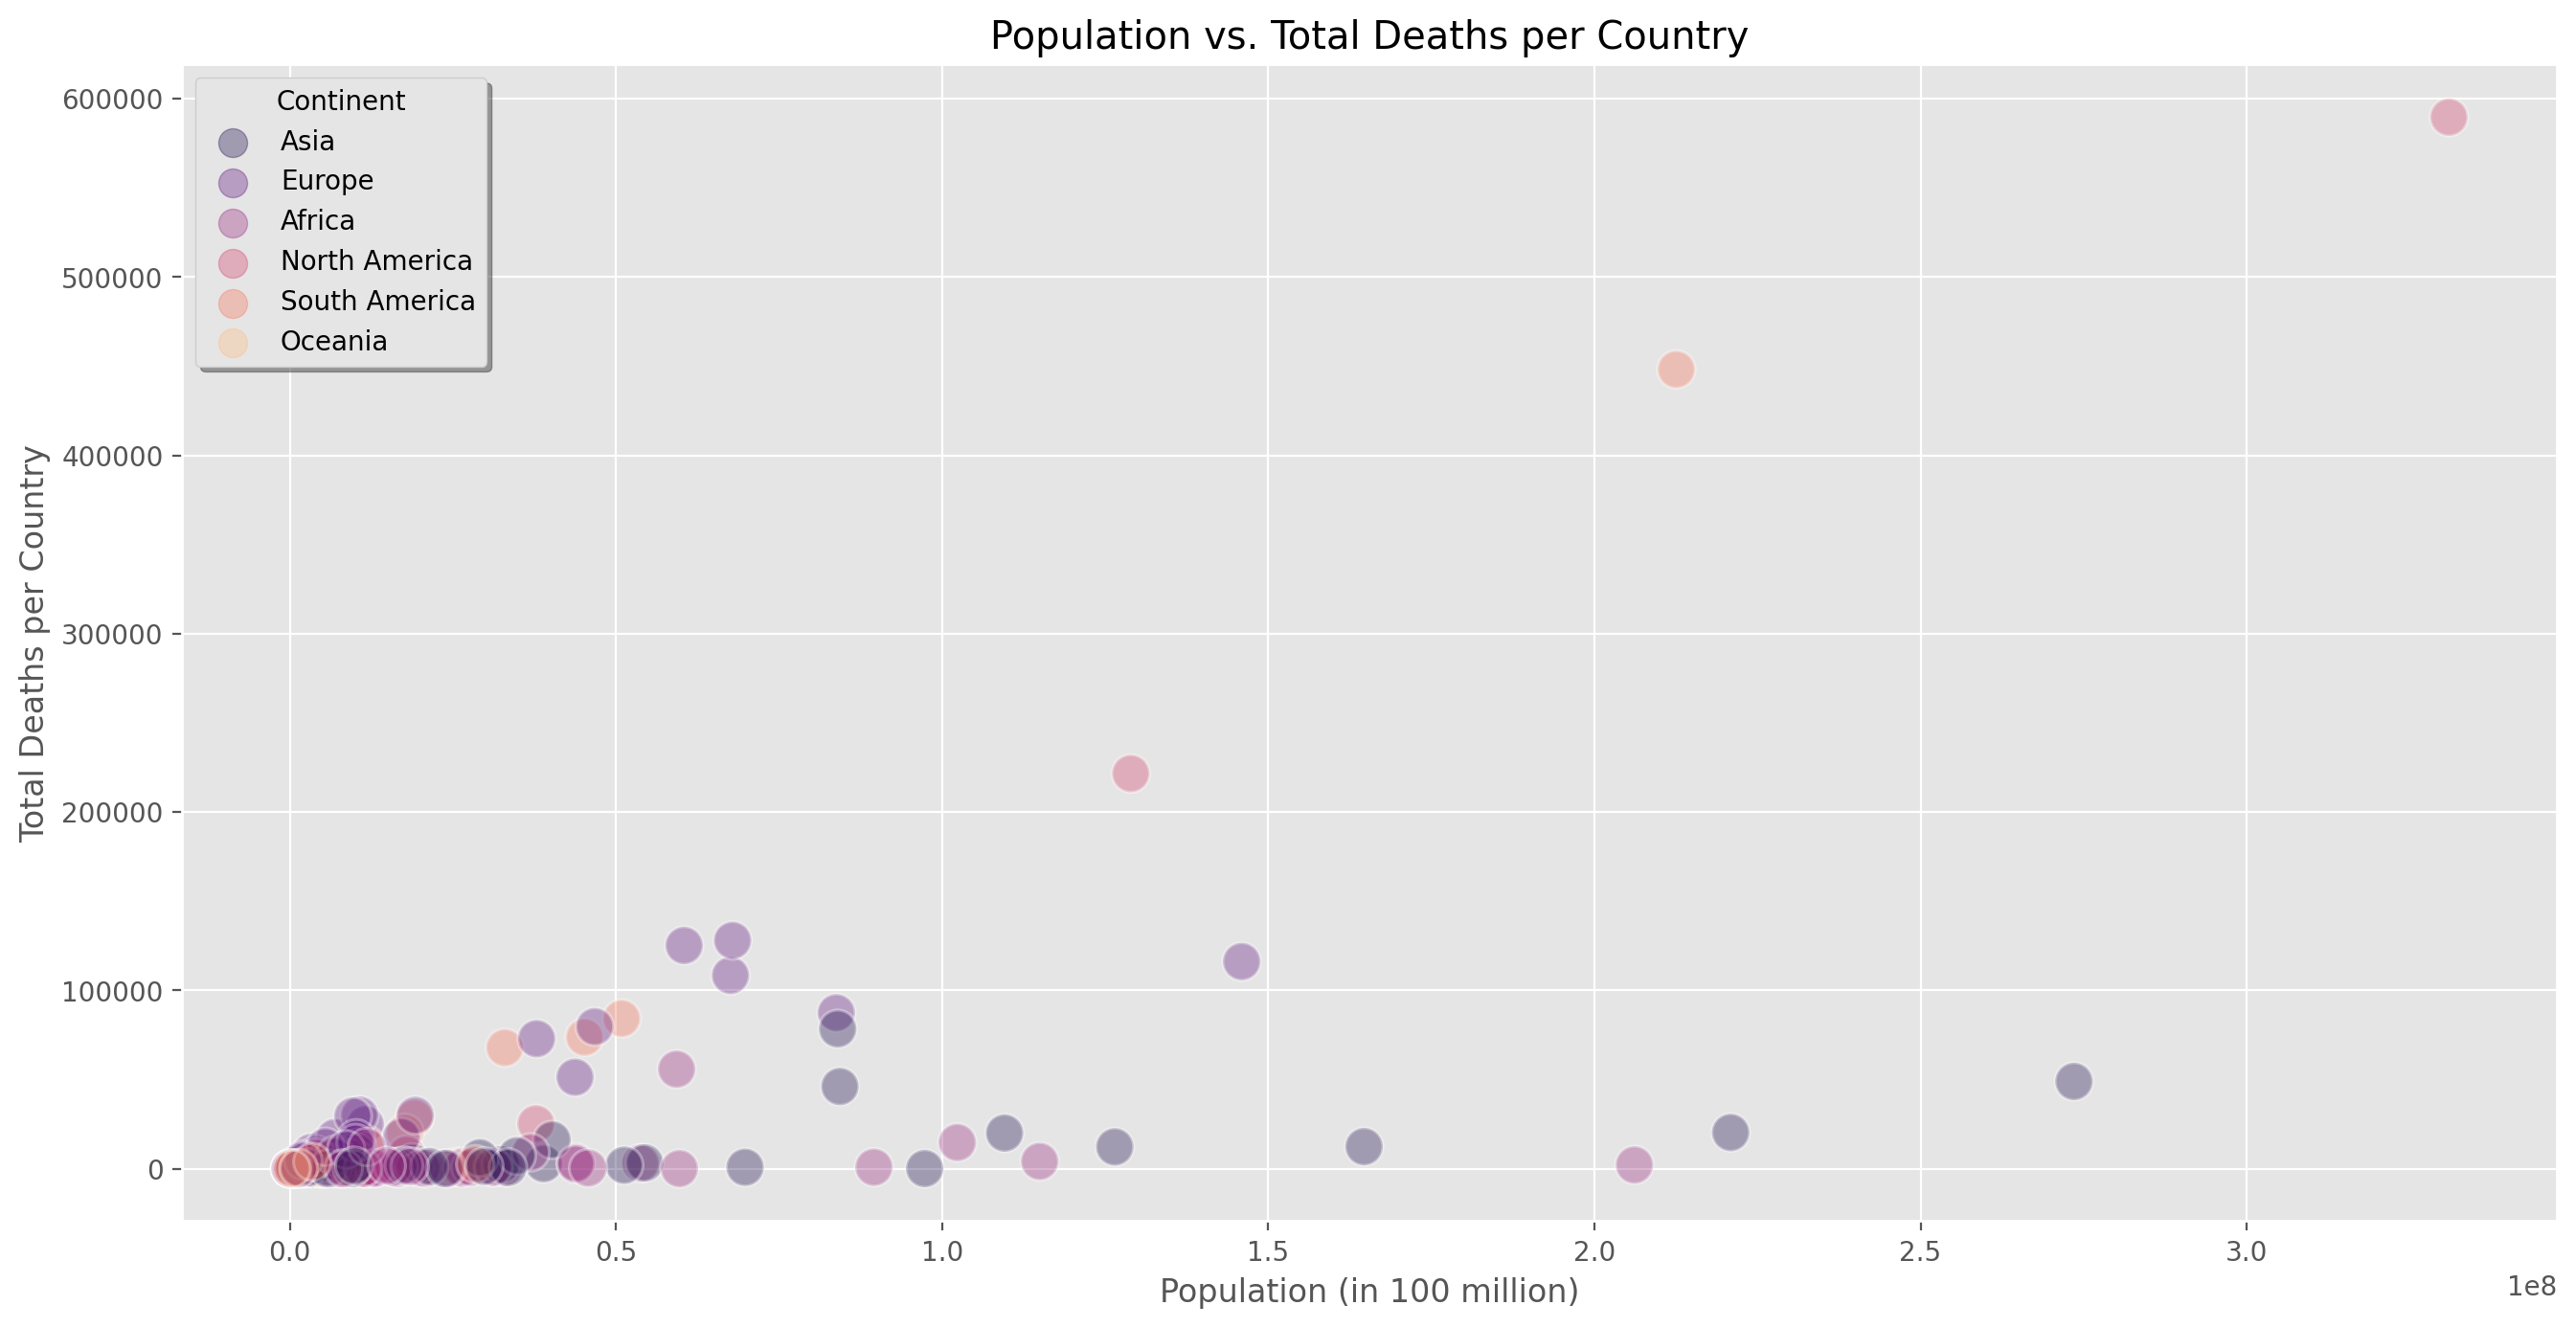

In [9]:
# REFINED SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)

pop_deaths_scatter = sns.scatterplot(x="population", 
                y="total_deaths", 
                hue="continent",
                palette="magma",
                alpha=0.35,
                s=200, 
                data=countries_exclude_chn_ind)

plt.legend(title="Continent", 
           shadow=True, 
           markerscale=1.80)

for lh in pop_deaths_scatter.legend_.legendHandles:
    lh.set_alpha(0.35)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")
plt.gca().invert_yaxis()

plt.show();

## Boxplots Measuring Central Tendency of Deaths By Region
* Utilizing OWID entries and omitting individual countries
* ***NOTE:*** JSON contains entry called OWID_WRL which countries world data, when filtering data by region, (i.e OWID_SAM, OWID_NAM, etc) I noticed there was a slight discrepancy in the total population when summing the population over the regions. 
* ***OWID_WRL*** Pop: 7794800000
* Sum of ***OWID_AFR, OWID_ASI, OWID_EUR, OWID_NAM, OWID_OCE, OWID_SAM*** Pop: 7794635392.0
* Slight descrepancy between populations of 164,608

In [10]:
countries.dropna(axis=0, subset=["total_deaths"], inplace=True)

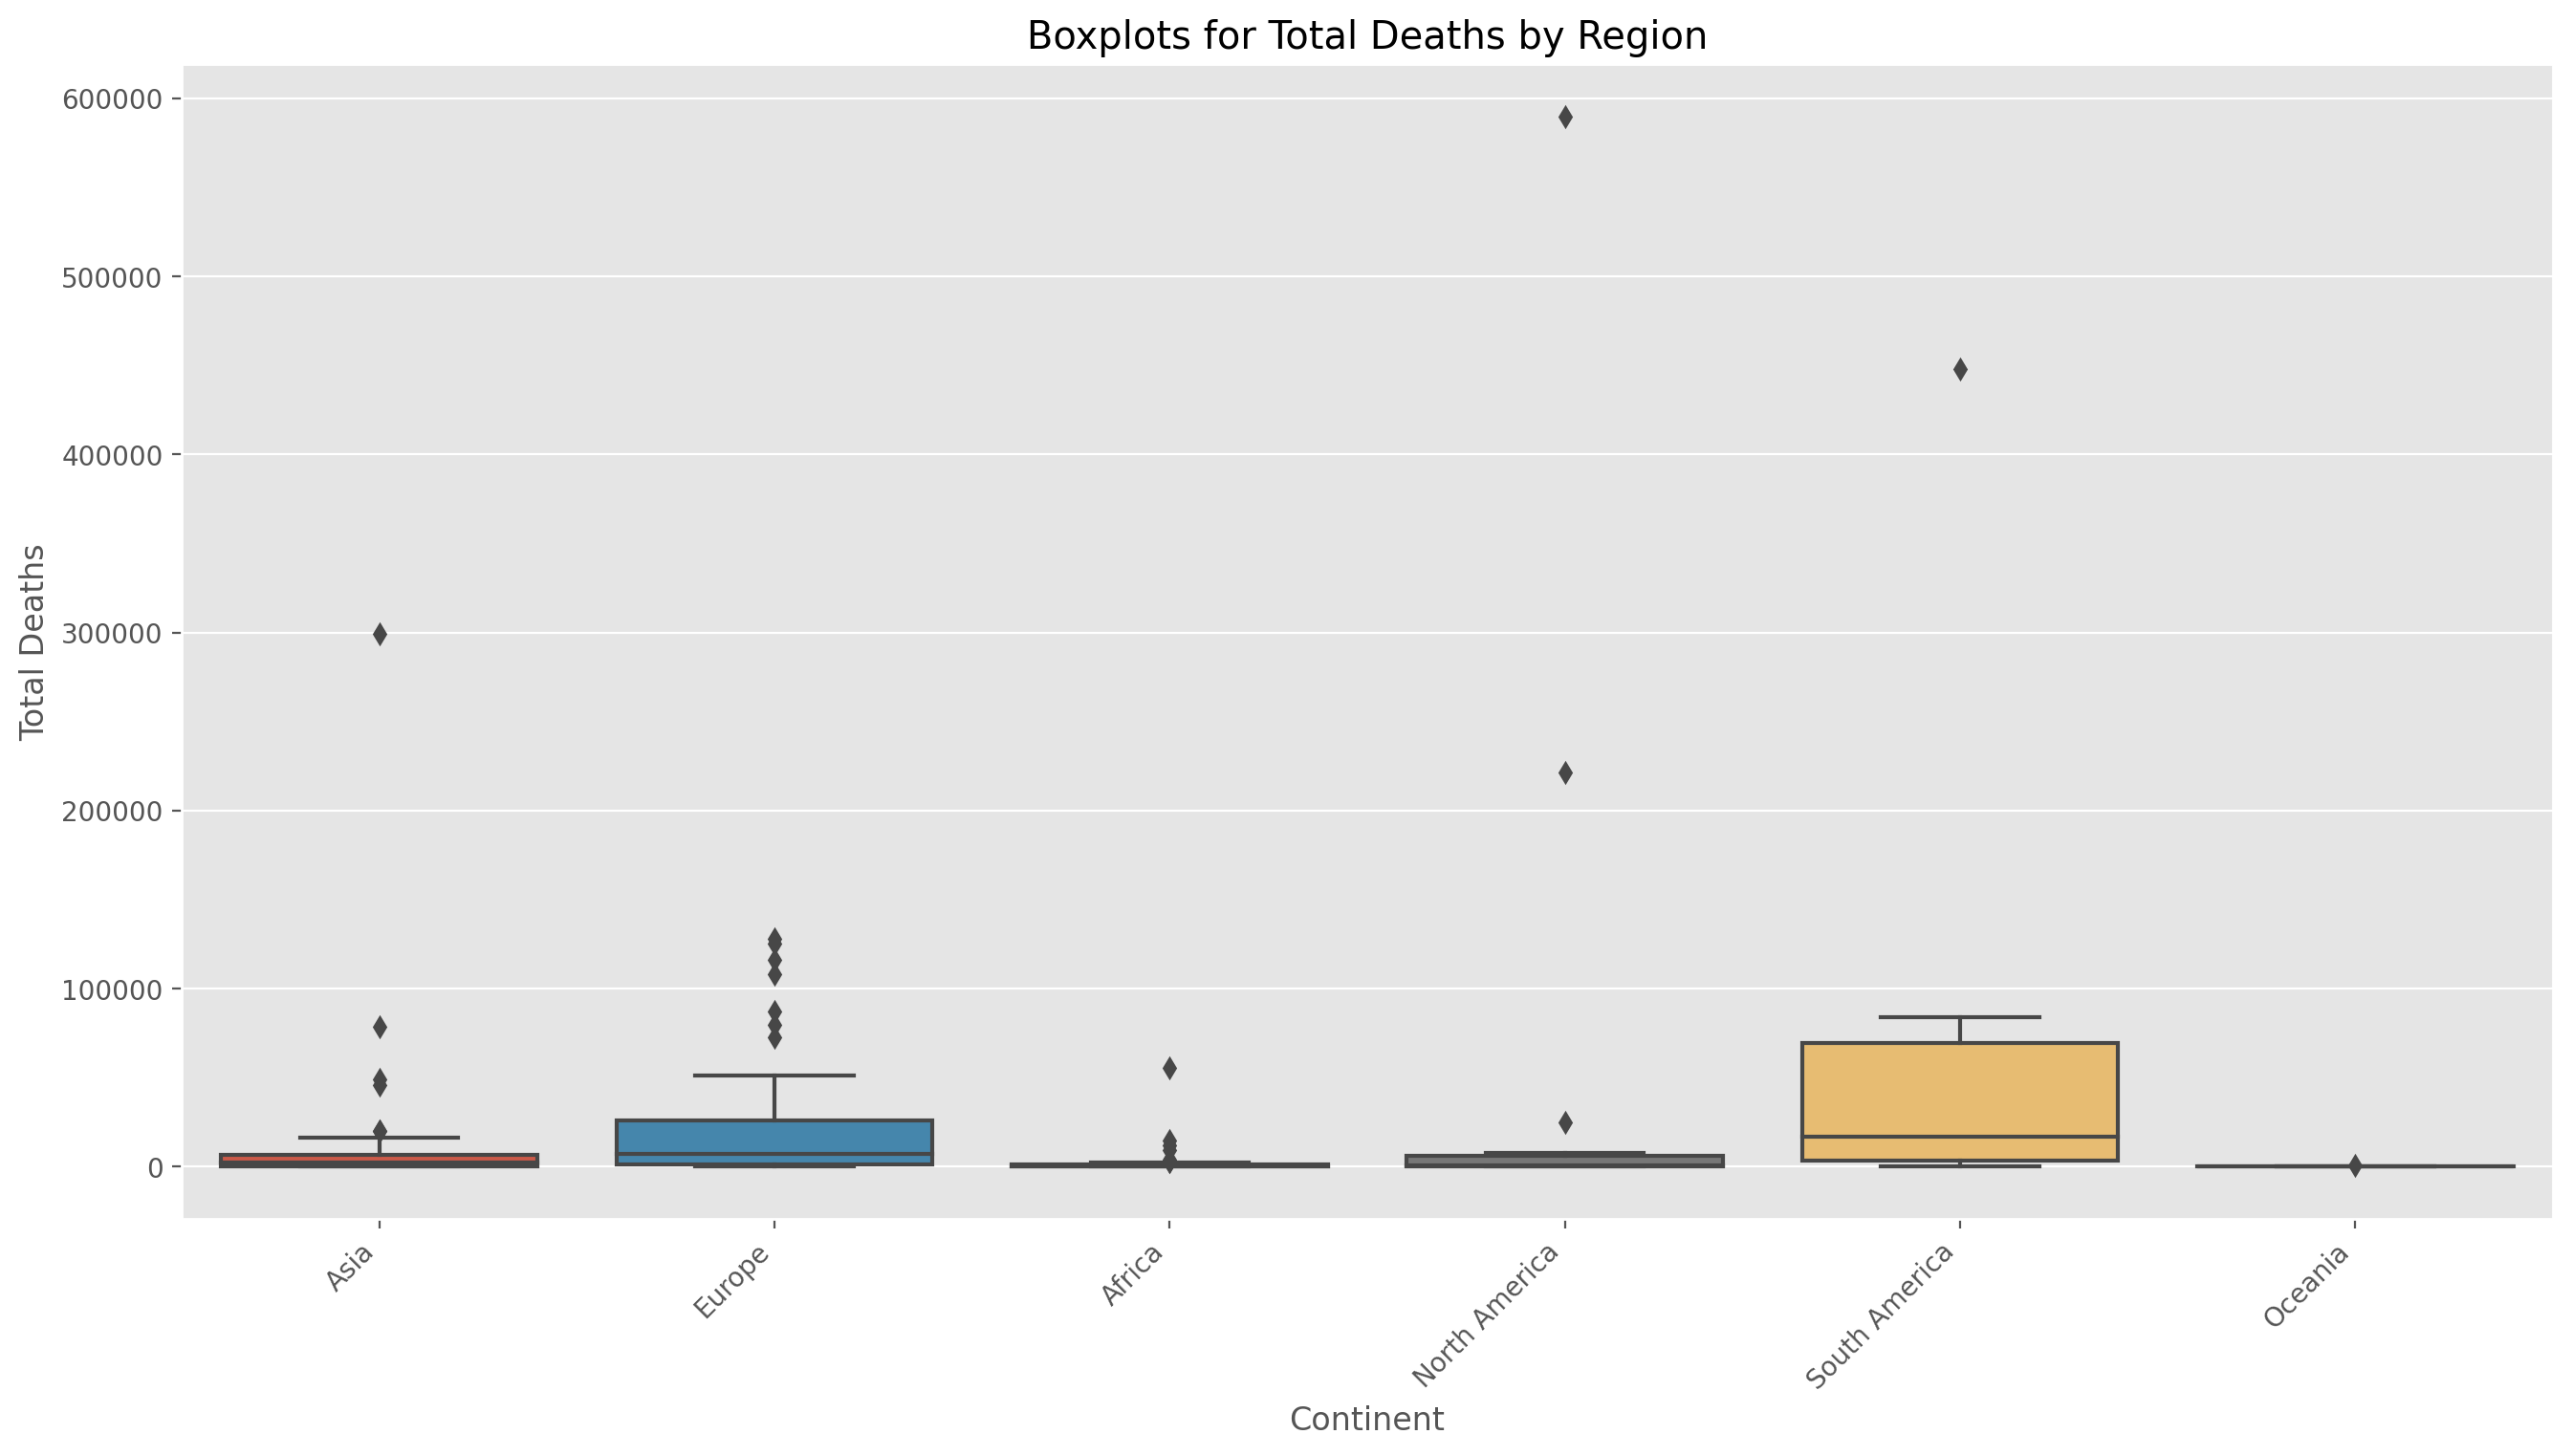

In [11]:
# RAW BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")

plt.show();

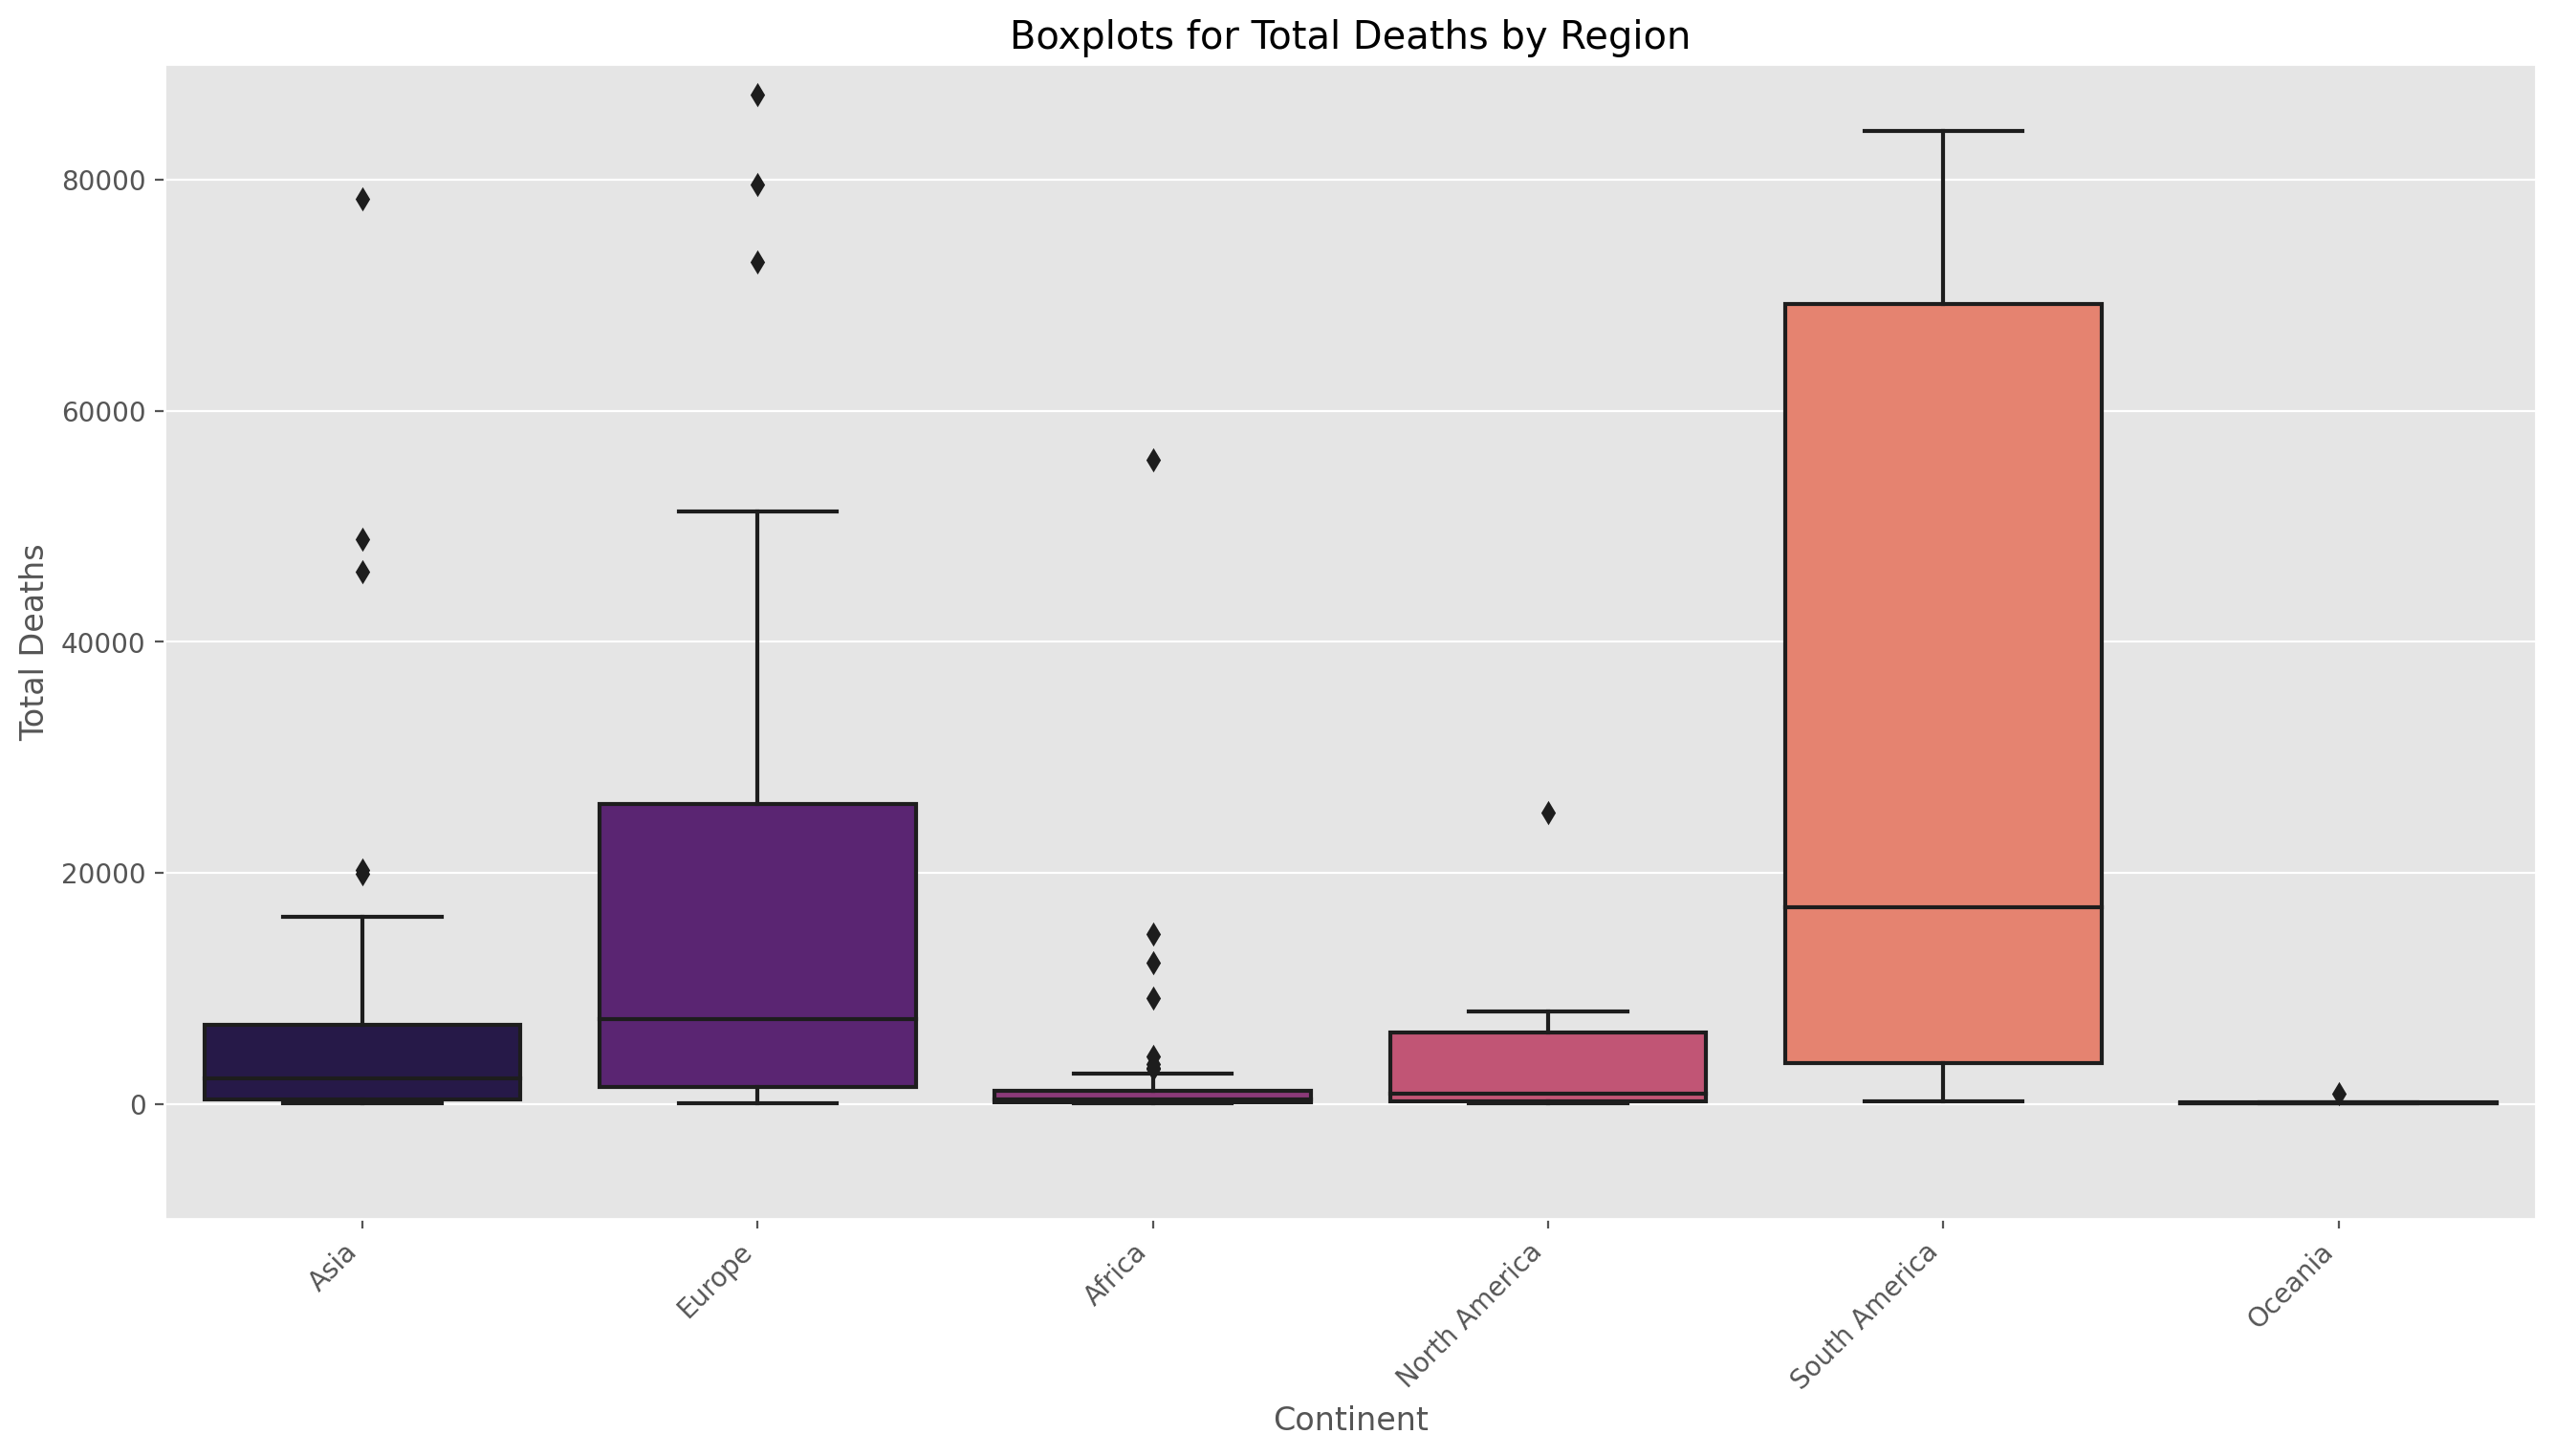

In [12]:
# Limiting y-axis to exclude major outliers
# REFINED BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", palette="magma", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.ylim(-10000, 90000)

plt.show();

# Part II: Searching for Linear Relationships Between Features

## Analyzing relationship between Population Density and Total Cases

Let us see if there is a linear correlation between Population Density and Total Cases.

In [13]:
density_cases = countries[["population_density", "total_cases", "continent"]].dropna(axis=0, subset=["population_density", "total_cases"])
density_cases

,population_density,total_cases,continent
AFG,54.422,65486,Asia
ALB,104.871,132176,Europe
DZA,17.348,126651,Africa
AND,163.755,13569,Europe
AGO,23.89,32149,Africa
...,...,...,...
VEN,36.253,222052,South America
VNM,308.127,5119,Asia
YEM,53.508,6649,Asia
ZMB,22.995,93106,Africa


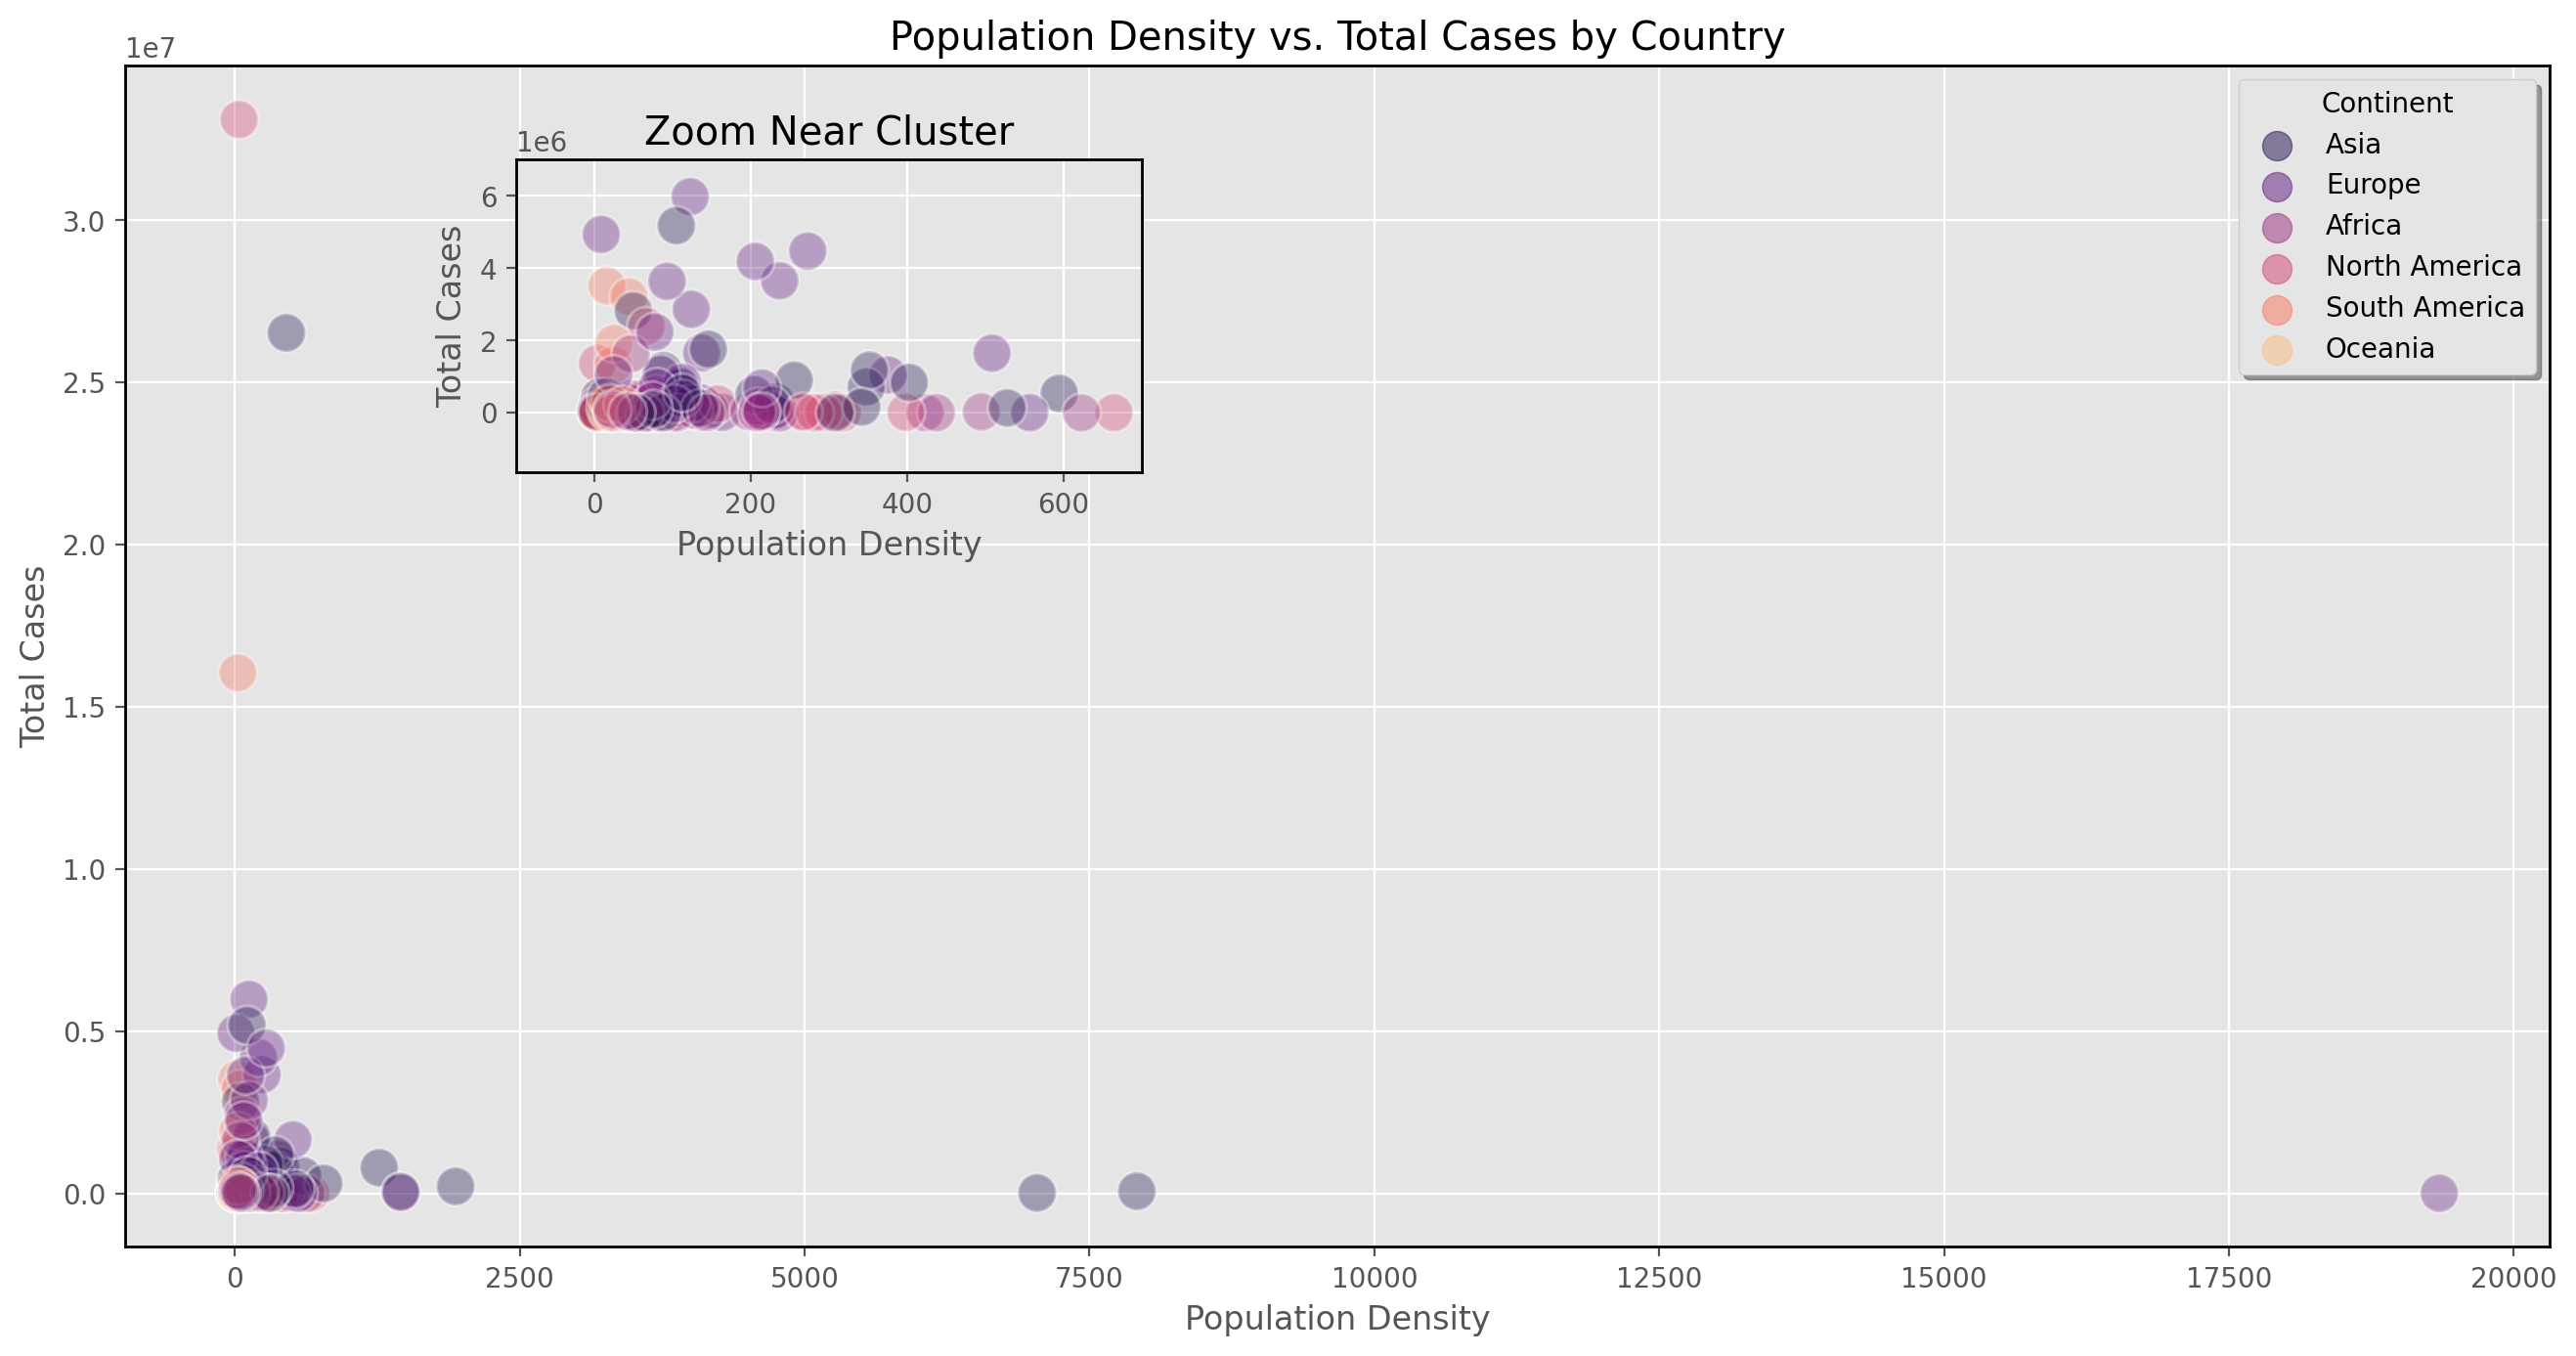

In [14]:
# Creating subplots

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Creating bigger scatterplot with appropriate legend

density_cases_scatter = sns.scatterplot(x="population_density", 
                                        y="total_cases",
                                        hue="continent",
                                        data=density_cases,
                                        alpha=0.35,
                                        s=200,
                                        palette="magma",
                                        ax=ax)

ax.legend(title="Continent",
          shadow=True,
          markerscale=1.80,)

for lh in density_cases_scatter.legend_.legendHandles:
    lh.set_alpha(0.50)

ax.set_title("Population Density vs. Total Cases by Country")
ax.set_xlabel("Population Density")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black") 



# Adding a new axes to create a zoomed in scatterplot

density_cases_zoom = plt.axes([0.25, 0.62, 0.20, 0.20])

sns.scatterplot(x="population_density", 
                y="total_cases", 
                hue="continent", 
                data=density_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=density_cases_zoom)

density_cases_zoom.set_title("Zoom Near Cluster")
density_cases_zoom.set_xlabel("Population Density")
density_cases_zoom.set_ylabel("Total Cases")
density_cases_zoom.set_xlim(left=-100, right=700)
density_cases_zoom.set_ylim(top=.7e7)
for spine in ["bottom", "top", "left", "right"]:
    density_cases_zoom.spines[spine].set_edgecolor("black")



plt.show()

### Hypothesis Test
It does not appear, visually, that there is any definitive linear relationship between Population Density and Total Cases, but we can use Scipy to calculate the Pearson Correlation Coefficient between these two features to reveal statistical insight. We can define a hypothesis test with the null and alternative hypothesis as follows:

$H_0:$ There is no linear correlation between Population Density and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Population Density and Total Cases.

In [15]:
sp.stats.pearsonr(density_cases.population_density, density_cases.total_cases)

(-0.030366414134027665, 0.68572506668049)

### Conclusion
The correlation coefficient here is $r=-0.02767698362417579$ and the p-value is $p=0.7138235793526161$. The correlation coefficient implies that Population Density and Total Cases have a poor linear correlation. The p-value confirms this since it is much larger than $\alpha=0.05$ which is the commonly accepted threshold for significance levels. Therefore, we can conclude that sufficient evidence does not exist to support the claim that there is a linear correlation between population density and total cases. 

## Analyzing relationship between Total Vaccinations and Total Cases

Let us see if there is a linear correlation between Total Vaccinations and Total Cases.

In [16]:
vaccinations_cases = countries[["total_vaccinations", "total_cases", "continent"]].dropna(axis=0, subset=["total_vaccinations", "total_cases"])
vaccinations_cases

,total_vaccinations,total_cases,continent
AFG,547901,65486,Asia
ALB,708846,132176,Europe
AND,32317,13569,Europe
AGO,757535,32149,Africa
ATG,34441,1257,North America
...,...,...,...
VEN,316000,222052,South America
VNM,1.0114e+06,5119,Asia
YEM,18555,6649,Asia
ZMB,134832,93106,Africa


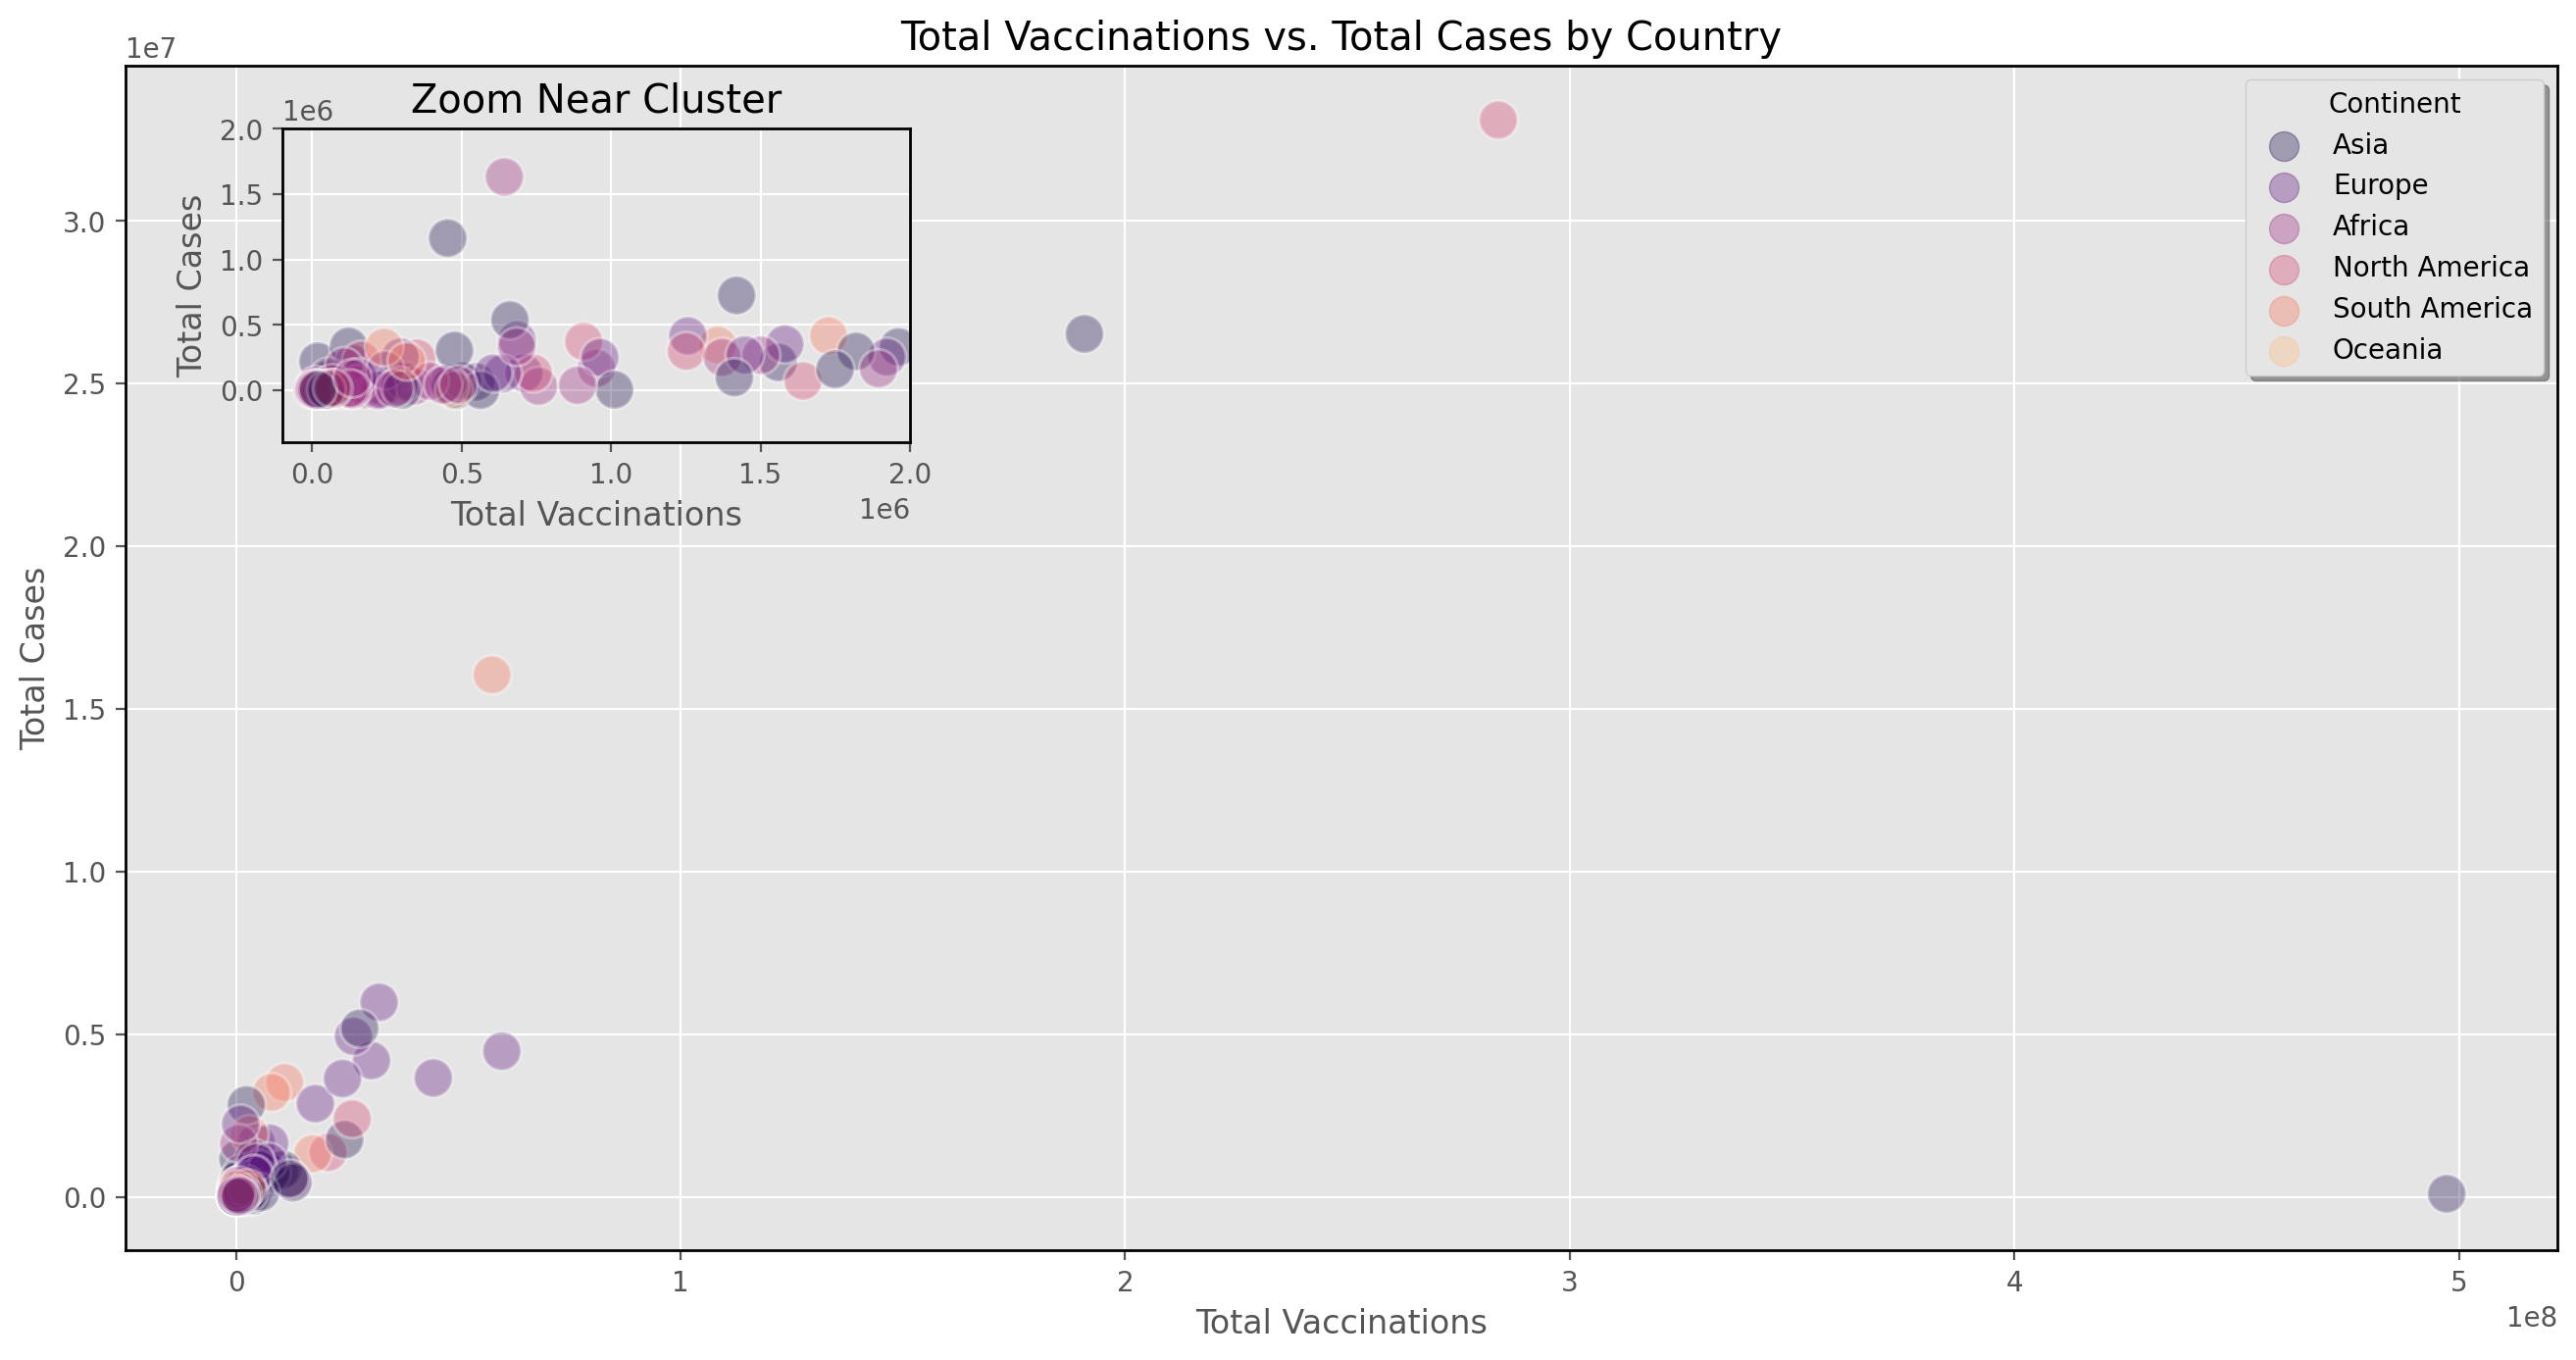

In [17]:
# Creating subplots 

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Configuring bigger scatterplot with its appropriate legend

vaccinations_cases_scatter = sns.scatterplot(x="total_vaccinations", 
                                             y="total_cases", 
                                             hue="continent",
                                             data=vaccinations_cases,
                                             alpha = 0.35,
                                             s=200,
                                             palette="magma",
                                             ax=ax)

ax.legend(title="Continent", 
           shadow=True,
           markerscale=1.8)

for lh in ax.legend_.legendHandles:
    lh.set_alpha(0.35)

ax.set_title("Total Vaccinations vs. Total Cases by Country")
ax.set_xlabel("Total Vaccinations")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black")



# Adding a new axes to create a zoomed in scatterplot

vaccinations_cases_zoom = plt.axes([0.175, 0.64, 0.20, 0.20])

sns.scatterplot(x="total_vaccinations", 
                y="total_cases", 
                hue="continent",
                data=vaccinations_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=vaccinations_cases_zoom)

vaccinations_cases_zoom.set_title("Zoom Near Cluster")
vaccinations_cases_zoom.set_xlabel("Total Vaccinations")
vaccinations_cases_zoom.set_ylabel("Total Cases")
vaccinations_cases_zoom.set_xlim(left=-0.01e7, right=.02e8)
vaccinations_cases_zoom.set_ylim(bottom=-0.04e7, top=.2e7)
for spine in ["bottom", "top", "left", "right"]:
    vaccinations_cases_zoom.spines[spine].set_edgecolor("black")



plt.show();

### Hypothesis Test
Although it is not completely clear, it appears that there is a positive linear correlation between Total Vaccinations and Total Cases, which is in some ways counterintuitive since we would expect Total Cases to diminsh as the population becomes vaccinated. We can follow the same steps as before and use Scipy to calculate statistical measures and design a formal hypothesis test with:

$H_0:$ There is no linear correlation between Total Vaccinations and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Total Vaccinations and Total Cases.

In [18]:
sp.stats.pearsonr(vaccinations_cases.total_cases, vaccinations_cases.total_vaccinations)

(0.549870478086142, 1.6813237887213282e-14)

The correlation coefficient here is $r=0.6913693206940721$ and the p-value is $p=4.473426365817474\cdot10^{-21}$. The correlation coefficient implies that Population Density and Total Cases have a strong positive linear correlation. The p-value confirms this since it is much smaller than $\alpha=0.05$. Therefore, we can conclude that sufficient evidence exists to support the claim that there is a linear correlation between Total Vaccinations and Total Cases. 

### Further Analysis
It is worth noting that this relationship can be misinterpreted since the names of the features are quite indicative. Someone may look at this and draw the erroneous conclusion that vaccinations cause, or are in some way responsible for a rise in coronavirus cases. However, there are a few important things worth noting. Firstly, these statistics were not being measured overtime&#8212;the numbers represent the most recent aggregation of Total Cases and Total Vaccinations. Furthermore, there might be a confounding variable that could cause an apparent linear corrleation between these two features. Let's see if there exists any relationship between Total Vaccinations and Population, and Total Cases and Population.

In [19]:
vaccinations_pop = countries[["total_vaccinations", "population"]].dropna(axis=0, subset=["total_vaccinations", "population"])
vaccinations_pop

,total_vaccinations,population
AFG,547901,3.89283e+07
ALB,708846,2.8778e+06
AND,32317,77265
AGO,757535,3.28663e+07
ATG,34441,97928
...,...,...
VEN,316000,2.84359e+07
VNM,1.0114e+06,9.73386e+07
YEM,18555,2.9826e+07
ZMB,134832,1.8384e+07


In [20]:
cases_pop = countries[["total_cases", "population"]].dropna(axis=0, subset=["total_cases", "population"])
cases_pop

,total_cases,population
AFG,65486,3.89283e+07
ALB,132176,2.8778e+06
DZA,126651,4.3851e+07
AND,13569,77265
AGO,32149,3.28663e+07
...,...,...
VEN,222052,2.84359e+07
VNM,5119,9.73386e+07
YEM,6649,2.9826e+07
ZMB,93106,1.8384e+07


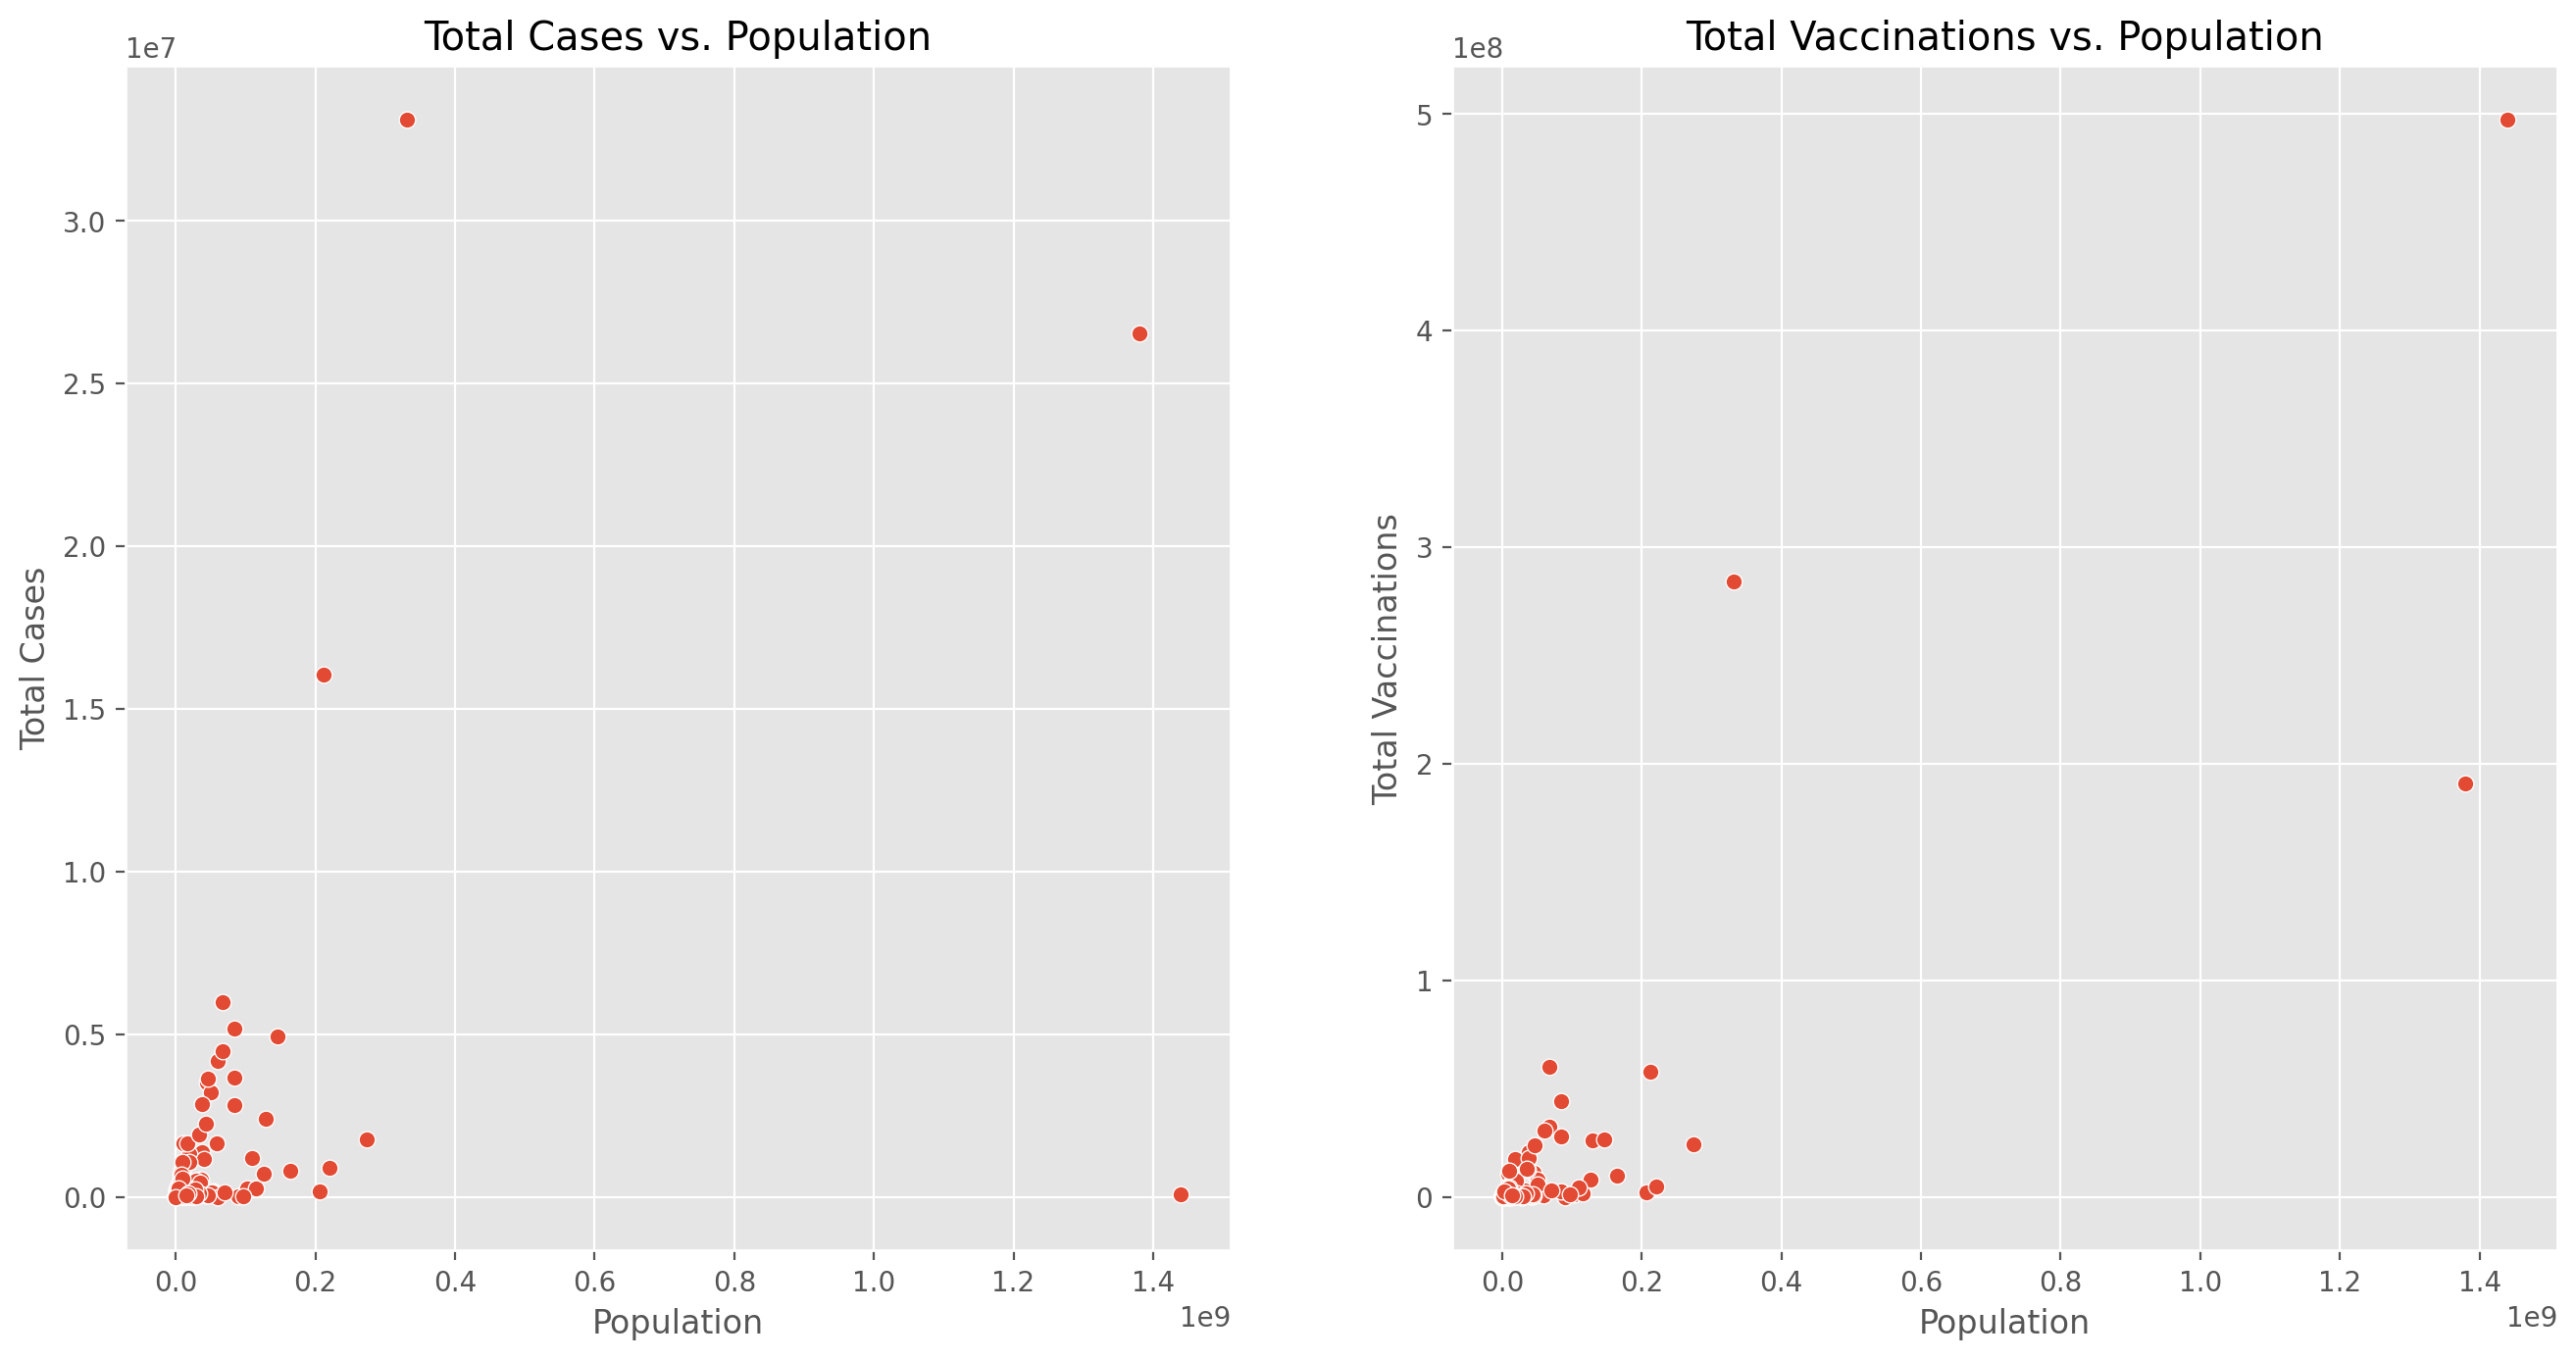

In [21]:
# Creating subplots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), dpi=200)



# Creating first scatterplot on first set of axes

sns.scatterplot(x="population",
                y="total_cases",
                data=cases_pop,
                ax=ax[0])

ax[0].set_title("Total Cases vs. Population")
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Total Cases")



# Creating second scatterplot on second set of axes

sns.scatterplot(x="population",
                y="total_vaccinations",
                data=vaccinations_pop,
                ax=ax[1])

ax[1].set_title("Total Vaccinations vs. Population")
ax[1].set_xlabel("Population")
ax[1].set_ylabel("Total Vaccinations")

plt.show()

In [22]:
sp.stats.pearsonr(vaccinations_pop.total_vaccinations, vaccinations_pop.population)

(0.8512531410036901, 8.624321267959222e-48)

In [23]:
sp.stats.pearsonr(cases_pop.total_cases, cases_pop.population)

(0.5216469334880294, 3.678263853936124e-14)

### Conclusion
Here we see that both Total Cases and Total Vaccinations appear to be positively correlated with Population. Total Vaccinations appear to have a strong correlation with Population while Total Vaccinations appears to have a moderate correlation with Population. Thus, it makes sense that Population could be a confounding variable that causes such a strong correlation between Total Cases and Total Vaccinations. This seems like a more logical conclusion since a higher population would imply a greater number of vaccines being distributed and a greater number of SARS-CoV-2 cases being detected. 

# Part III: Introducing Supervised Machine Learning
## Implementing Linear Regression ML Model
My goal with this section is leverage Scikit learn to train a linear regression model based on key features from the JSON data we collected. In order to create a robust predictive model we should provide a wide array of features to train our model with. 


Before we begin, let's first gain insight on the pearson correlation coefficients between all columns and total deaths.

In [24]:
r_coeff = pd.Series(dtype='float64')

valid_entries = countries.drop(columns=["last_updated_date", "location", "continent", "tests_units"])

for column in valid_entries.columns:
    if column == "total_deaths":
        continue
        
    temp = valid_entries[[column, "total_deaths"]].dropna(axis=0, subset=[column, "total_deaths"])
    r, pval = sp.stats.pearsonr(temp[column], temp["total_deaths"])
    
    ser = pd.Series([r], index=[column])
    r_coeff = r_coeff.append(ser)
    
r_coeff.sort_values(ascending=False)

weekly_hosp_admissions                   0.954133
total_cases                              0.929415
total_tests                              0.904075
icu_patients                             0.866998
people_fully_vaccinated                  0.854732
people_vaccinated                        0.853979
hosp_patients                            0.811387
weekly_icu_admissions                    0.753492
new_deaths                               0.640286
new_deaths_smoothed                      0.631022
new_tests                                0.556855
new_cases                                0.538075
new_cases_smoothed                       0.526152
total_vaccinations                       0.496351
population                               0.400547
total_deaths_per_million                 0.336078
new_tests_smoothed                       0.326346
total_cases_per_million                  0.204583
new_deaths_smoothed_per_million          0.195555
new_deaths_per_million                   0.195355


### Feature Selection
We can see from the series we constructed that there are many features that have little to no linear correlation with the total number of deaths for each country. However, there are a few features that have a very strong linear corrleation with the total number of deaths for each country. Let's construct a linear ML model and feed it the 3 most highly linearly correlated features: Total Cases, Total Test, and Weekly Hospital Admissions.

In [46]:
linreg_df = countries[["total_cases", "total_tests", "weekly_hosp_admissions", "total_deaths"]].dropna(axis=0, subset=["total_cases", "total_tests", "weekly_hosp_admissions", "total_deaths"])
linreg_df

,total_cases,total_tests,weekly_hosp_admissions,total_deaths
BEL,1.04713e+06,1.34835e+07,972.638,24823
HRV,353735,1.95889e+06,1003.51,7883
CYP,71836,6.41765e+06,93.705,353
EST,128489,1.39053e+06,139.743,1240
DEU,3.65302e+06,5.91281e+07,1583.67,87385
GRC,388929,8.70768e+06,2569.16,11734
ISL,6555,372006,0.937,29
IRL,254870,4.72954e+06,26.855,4941
ISR,839308,1.66692e+07,32,6397
ITA,4.18819e+06,6.38227e+07,2084.28,125153


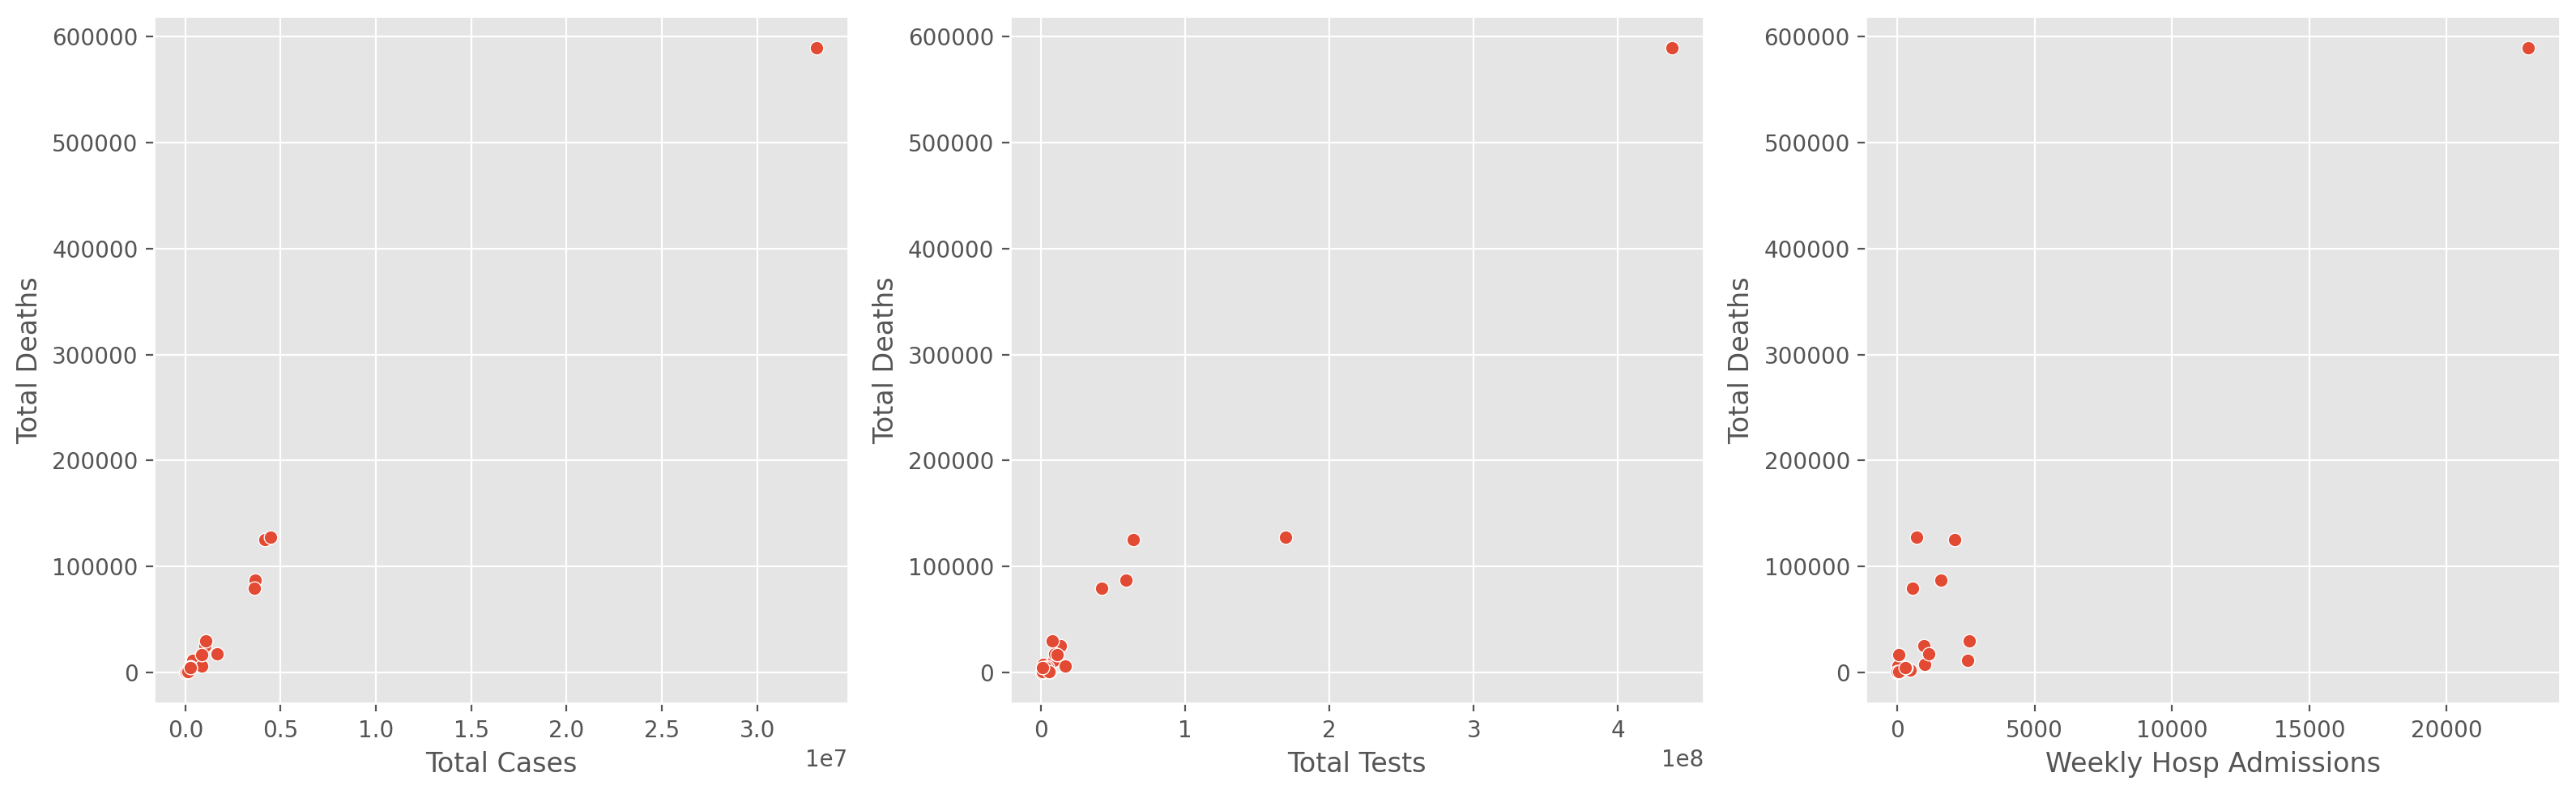

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5), dpi=200)


feature_labels = ["total_cases", "total_tests", "weekly_hosp_admissions"]

for iterator in range(0, len(feature_labels)):
    sns.scatterplot(x=feature_labels[iterator],
                    y="total_deaths",
                    data=linreg_df,
                    ax=ax[iterator])
    
    ax[iterator].set_xlabel(feature_labels[iterator].replace('_', ' ').title())
    ax[iterator].set_ylabel("Total Deaths")

plt.tight_layout()
plt.show()

In [48]:
sp.stats.pearsonr(linreg_df.total_cases, linreg_df.total_deaths)

(0.9923865581817279, 9.526242813542589e-19)

In [49]:
sp.stats.pearsonr(linreg_df.weekly_hosp_admissions, linreg_df.total_deaths)

(0.958165356522314, 8.927803178639534e-12)

In [50]:
sp.stats.pearsonr(linreg_df.total_tests, linreg_df.total_deaths)

(0.9813873499095503, 4.452557613091004e-15)

The pearson correlation coefficient of these 3 features and Total Deaths are substantial, and, as a result, can be used to train a linear regression model. Ideally, this model will accurately predict future Total Deaths based on the numerical value provided for each feature, but linear models have their limitations and the error might increase as the virus evolves.

In [51]:
X = linreg_df.drop("total_deaths", axis=1)
y = linreg_df["total_deaths"]

In [52]:
X.head()

,total_cases,total_tests,weekly_hosp_admissions
BEL,1.04713e+06,1.34835e+07,972.638
HRV,353735,1.95889e+06,1003.51
CYP,71836,6.41765e+06,93.705
EST,128489,1.39053e+06,139.743
DEU,3.65302e+06,5.91281e+07,1583.67


In [53]:
y.head()

BEL    24823
HRV     7883
CYP      353
EST     1240
DEU    87385
Name: total_deaths, dtype: object

### Train | Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Import

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_model = LinearRegression()

### Model Fitting to Training Data

In [58]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
predictions = linear_model.predict(X_test)

### Error Analysis of Linear Model

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
MAE = mean_absolute_error(y_test, predictions)

In [62]:
MSE = mean_squared_error(y_test, predictions)

In [63]:
RMSE = np.sqrt(MSE)

In [64]:
MAE, MSE, RMSE

(6989.99831971985, 79862660.98485155, 8936.591127765192)

### Conclusion
We can see that we have relatively poor error metrics. RMSE generally punishes greater discrepancies, but even our MAE is relatively high when considering the magnitude of the measurements. Our MAE and RMSE indicate poor accuracy with Linear Regression. 